## A Water Quality Check Model

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Loading the data

# Read the CSV file
WQ_data = pd.read_csv("water_potability.csv")
# View the first 5 rows
WQ_data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
WQ_data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


## Data Study

In [5]:
WQ_data.shape

(3276, 10)

In [6]:
# Checking for any blank spaces in table
WQ_data.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [7]:
WQ_data.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [8]:
#Filling in blank spaces with the mean values
WQ_data= WQ_data.fillna(WQ_data.mean())

In [9]:
WQ_data.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [10]:
WQ_data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


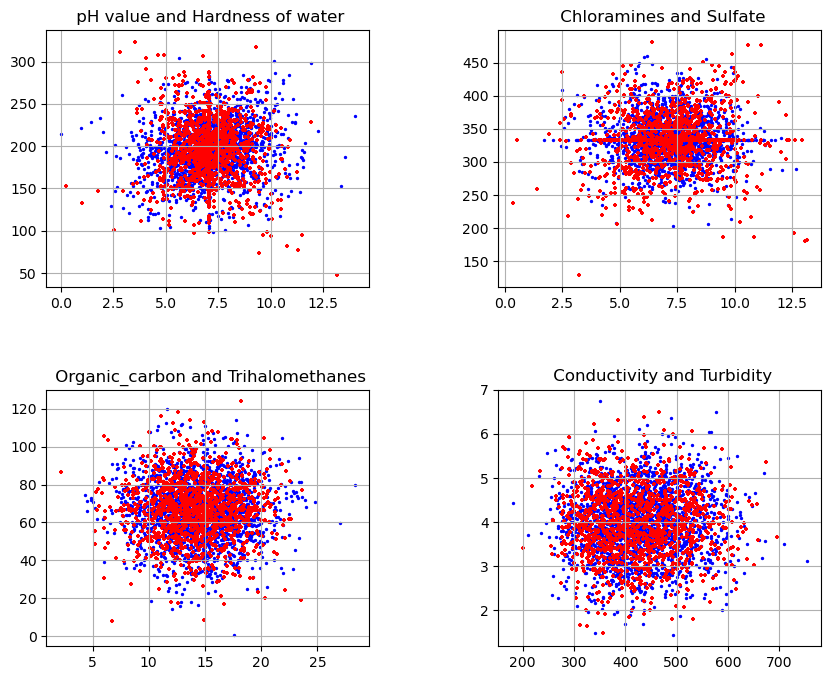

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})


axs[0,0].scatter(WQ_data['ph'][WQ_data['Potability']==0],WQ_data['Hardness'][WQ_data['Potability']==0],c='b', label='Not Potable', marker='o',s=2)
axs[0,0].scatter(WQ_data['ph'][WQ_data['Potability']==1],WQ_data['Hardness'][WQ_data['Potability']==1],c='r', label='Potable', marker='+', s=5)
axs[0,0].set_title(' pH value and Hardness of water')
axs[0,0].grid(True)

axs[0,1].scatter(WQ_data['Chloramines'][WQ_data['Potability']==0],WQ_data['Sulfate'][WQ_data['Potability']==0],c='b', label='Not Potable', marker='o',s=2)
axs[0,1].scatter(WQ_data['Chloramines'][WQ_data['Potability']==1],WQ_data['Sulfate'][WQ_data['Potability']==1],c='r', label='Potable', marker='+',s=5)
axs[0,1].set_title(' Chloramines and Sulfate')
axs[0,1].grid(True)

axs[1,0].scatter(WQ_data['Organic_carbon'][WQ_data['Potability']==0],WQ_data['Trihalomethanes'][WQ_data['Potability']==0],c='b', label='Not Potable', marker='o',s=2)
axs[1,0].scatter(WQ_data['Organic_carbon'][WQ_data['Potability']==1],WQ_data['Trihalomethanes'][WQ_data['Potability']==1],c='r', label='Potable', marker='+',s=5)
axs[1,0].set_title(' Organic_carbon and Trihalomethanes')
axs[1,0].grid(True)

axs[1,1].scatter(WQ_data['Conductivity'][WQ_data['Potability']==0],WQ_data['Turbidity'][WQ_data['Potability']==0],c='b', label='Not Potable', marker='o',s=2)
axs[1,1].scatter(WQ_data['Conductivity'][WQ_data['Potability']==1],WQ_data['Turbidity'][WQ_data['Potability']==1],c='r', label='Potable', marker='+',s=5)
axs[1,1].set_title(' Conductivity and Turbidity')
axs[1,1].grid(True)
plt.show()


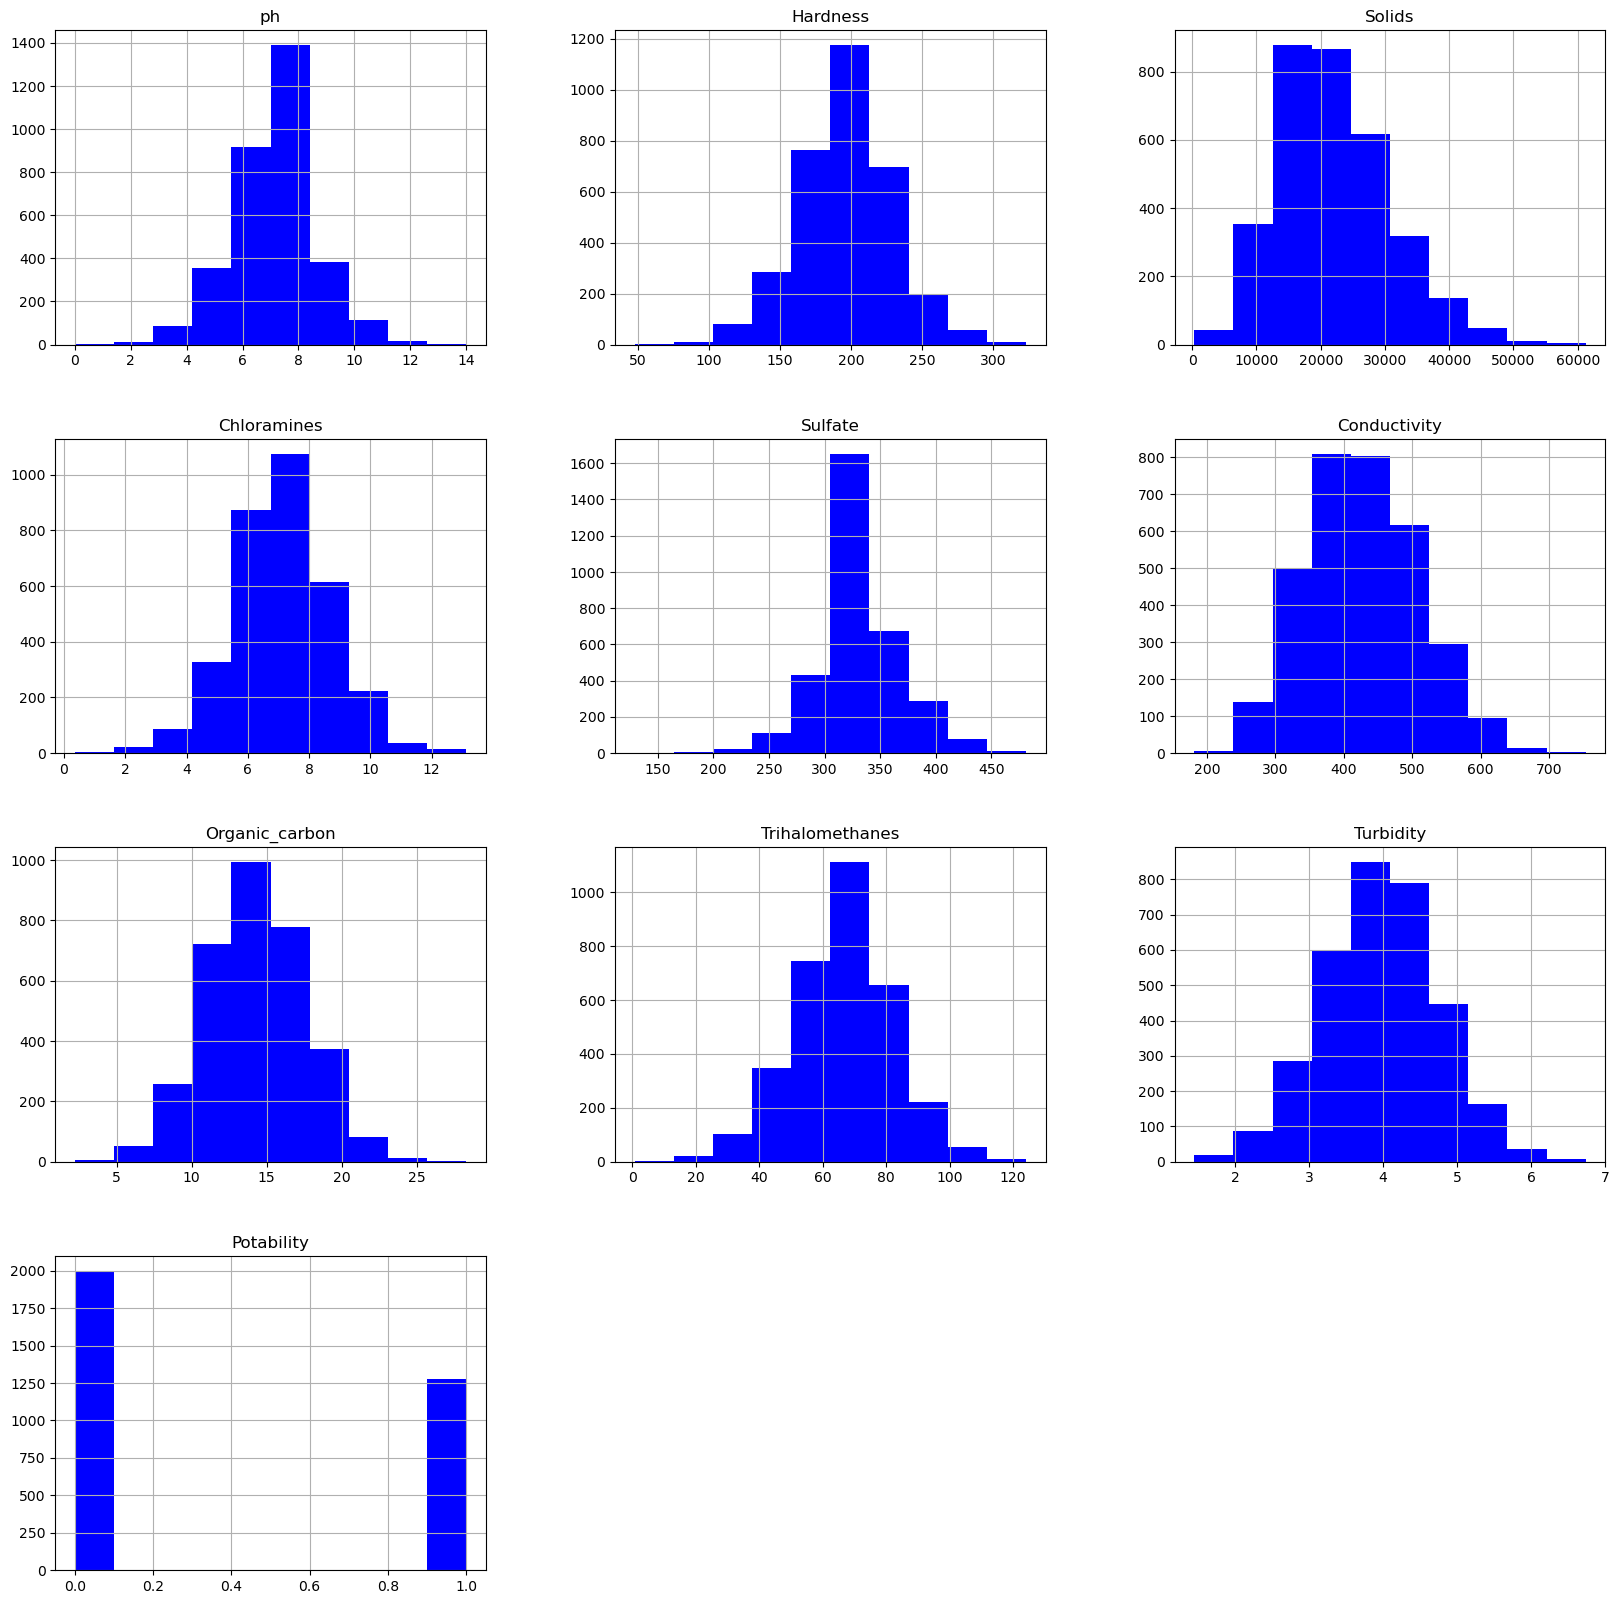

In [12]:
WQ_data.hist(bins = 10, figsize = (20,20), color='blue')
plt.show()

In [13]:
corr_matrix = WQ_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

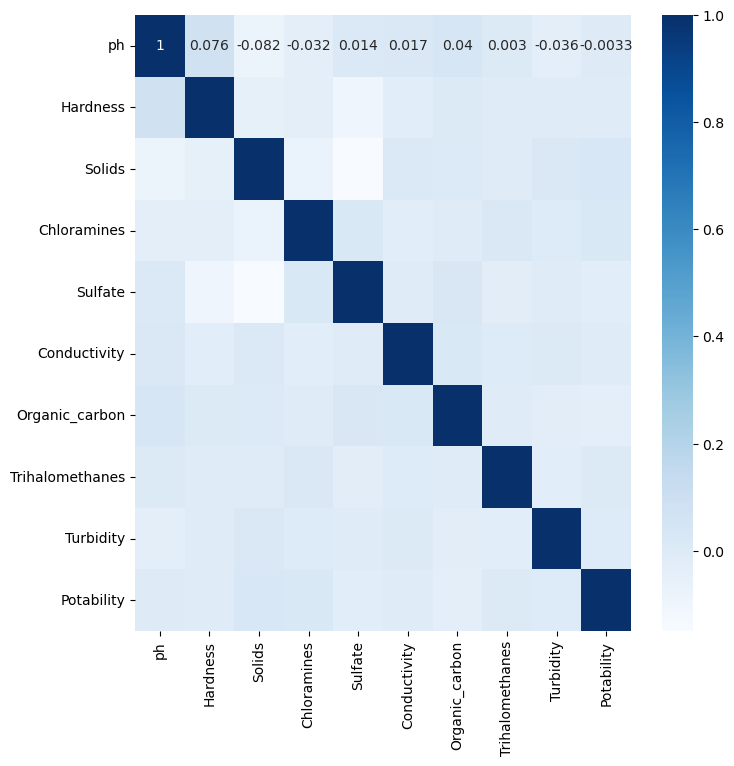

In [14]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'Blues')

#### This clearly shows that there is no significant correlation between any of the parameters.

In [28]:
df_scaled = WQ_data.copy() 
  
# apply normalization techniques 
for column in df_scaled.columns: 
    df_z_scaled[column] = (df_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data 
print(df_scaled)

                ph  Hardness    Solids  Chloramines       Sulfate  \
0    -6.042211e-16  0.259155 -0.139450     0.112398  9.612107e-01   
1    -2.288990e+00 -2.036103 -0.385928    -0.307647  3.145507e-15   
2     6.927620e-01  0.847535 -0.240011     1.360386  3.145507e-15   
3     8.408220e-01  0.547568  0.000493     0.591917  6.394214e-01   
4     1.368360e+00 -0.464358 -0.460178    -0.363642 -6.540767e-01   
...            ...       ...       ...          ...           ...   
3271 -1.641337e+00 -0.081745  2.915743     0.028023  7.241535e-01   
3272  4.952948e-01 -0.085654 -0.534214     0.593200  3.145507e-15   
3273  1.591011e+00 -0.626734  1.270616     0.143995  3.145507e-15   
3274 -1.329313e+00  1.041196 -1.143883    -0.517294  3.145507e-15   
3275  5.400685e-01 -0.038540 -0.525732     0.244478  3.145507e-15   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0         1.708693       -1.180470         1.305950  -1.286101   -0.799653  
1         2.06226

## Water Quality Predictive Model

In [24]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

def compute_cost(X, y, w, b, lambda_= 1):
    m+1, n == X.shape
    cost = 0
    i=1
    while (i<=m):
        z = np.dot(X.iloc[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        i=i+1
        
    total_cost = cost/m
    return total_cost



In [25]:
X_train = df_scaled.drop('Potability', axis = 1)
Y_train = df_scaled['Potability']
display(X_train.iloc[1])
display(Y_train)

ph                -2.288990e+00
Hardness          -2.036103e+00
Solids            -3.859277e-01
Chloramines       -3.076467e-01
Sulfate            3.145507e-15
Conductivity       2.062260e+00
Organic_carbon     2.705559e-01
Trihalomethanes   -6.383825e-01
Turbidity          6.841135e-01
Name: 1, dtype: float64

0      -0.799653
1      -0.799653
2      -0.799653
3      -0.799653
4      -0.799653
          ...   
3271    1.250161
3272    1.250161
3273    1.250161
3274    1.250161
3275    1.250161
Name: Potability, Length: 3276, dtype: float64

In [26]:
m=3275
n=9
# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, Y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [27]:
test_w = np.array([0.01,0.2,0.001,0.2,0.1,0.2,0.2,0.01,0.1])
test_b = 5
cost = compute_cost(X_train, Y_train, test_w, test_b)

print('Cost at test w,b: {:.7f}'.format(cost))


Cost at test w,b: 5.0134691
